

# AAI612: Deep Learning & its Applications


*Notebook 3.1: Activation Functions*

<a href="https://colab.research.google.com/github/harmanani/AAI612/blob/main/Week3/Notebook3.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Activation Functions

Activation functions are biologically inspired and are abstractions representing the rate of action potential firing in the cell.  They define the output of a node given a set of inputs while keeping this output restricted to a certain limit.  The importance of activation functions stems from the fact that they introduce non-linearity into the neural network.  They should be nonlinear to encode complex patterns of the data.

## Desirable Features of an Activation Function 

1. Ability to avoid the vanishing gradient problem.

2. Zero-Centered: Output of the activation function should be symmetrical at zero so that the gradients do not shift to a particular direction.

3. Computational Expense: Activation functions are applied after every layer and need to be calculated millions of times in deep networks. Hence, they should be computationally inexpensive to calculate.

4. Differentiable: As mentioned, neural networks are trained using the gradient descent process, hence the layers in the model need to differentiable or at least differentiable in parts. This is a necessary requirement for a function to work as activation function layer.

In [1]:
import matplotlib.pylab as plt
import numpy as np

## Linear Function

A linear activation function takes the inputs, multiplied by the weights for each neuron, and creates an output signal proportional to the input. In one sense, a linear function is better than a step function because it allows multiple outputs, not just yes and no.
However, a linear activation function has two major problems:
1. Not possible to use backpropagation (gradient descent) to train the model — the derivative of the function is a constant, and has no relation to the input, X. So it’s not possible to go back and understand which weights in the input neurons can provide a better prediction.
2. All layers of the neural network collapse into one — with linear activation functions, no matter how many layers in the neural network, the last layer will be a linear function of the first layer (because a linear combination of linear functions is still a linear function). So a linear activation function turns the neural network into just one layer.
A neural network with a linear activation function is simply a linear regression model. It has limited power and ability to handle complexity varying parameters of input data.
And that’s why linear activation function is hardly used in deep learning.

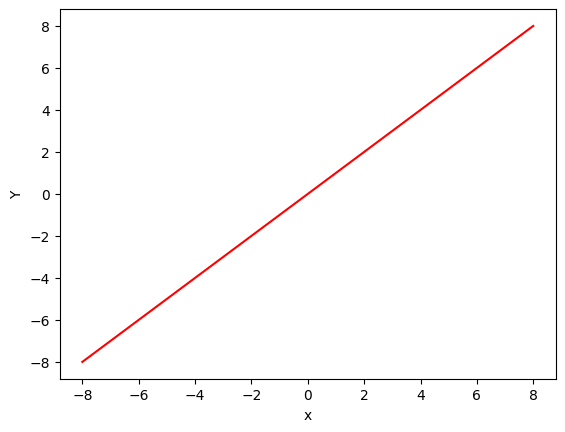

In [2]:
x_values = np.linspace(-8, 8, 1000)
y_values = x_values
plt.plot(x_values, y_values, 'red')
plt.xlabel('x')
plt.ylabel("Y")
plt.show()

## Sigmoid Function

The sigmoid function is a special form of the logistic function and is usually denoted by $\sigma(x)$. It is given by:

$\text{Sigmoid}(x) = \sigma(x) = \frac{1}{1 + e^{-x}}$

The sigmoid function is called a squashing function as its domain is the set of all real numbers, and its range is (0, 1). The shape of the function for all possible inputs is an S-shape from zero up through 0.5 to 1.0.  If the input to the function is either a very large negative number or a very large positive number,  the output is always between 0 and 1.  Same goes for any number between $-\infty$ and $+\infty$.  

Using a linear activation function in a neural network would lead to a model that can only learn linearly separable problems.  We can add hidden layers and sigmoid activation functions in order for the neural network to learn a non-linearly separable problem. 


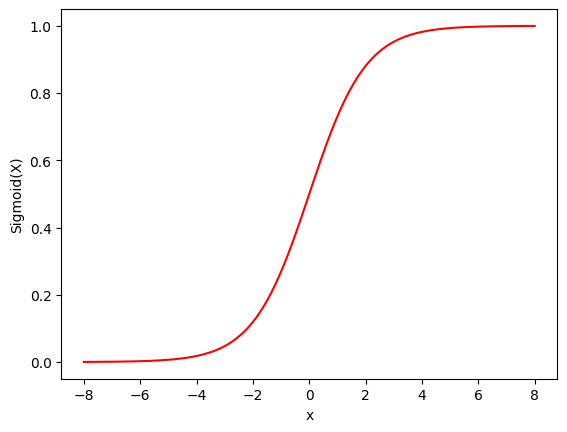

In [3]:
x_values = np.linspace(-8, 8, 1000)
f = (1/(1+np.exp(-x_values)))
plt.plot(x_values, f, 'red')
plt.xlabel('x')
plt.ylabel("Sigmoid(X)")
plt.show()

## Hyperbolic Tangent

The hyperbolic tangent function, or tanh for short, is a nonlinear activation function that is similar to the sigmoid function (in terms of shaep).  Its output values vary between -1.0 and 1.0. In the later 1990s and through the 2000s, the tanh function was preferred over the sigmoid activation function as models that used it were easier to train and often had better predictive performance.  It is generally noted that the hyperbolic tangent activation function typically performs better than the logistic sigmoid.



$\text{Tanh}(x) = \tanh(x) = \frac{e^{x} - e^{-x}} {e^x + e^{-x}}$

Two main issues with both the sigmoid and tanh functions:

1. A general problem is that both the sigmoid and tanh functions saturate. This means that large values snap to 1.0 and small values snap to -1 or 0 for tanh and sigmoid respectively. Further, the functions are only really sensitive to changes around their mid-point of their input, such as 0.5 for sigmoid and 0.0 for tanh.

2. It was noted that layers deep in large networks using these nonlinear activation functions fail to receive useful gradient information. Error is back propagated through the network and used to update the weights. The amount of error decreases dramatically with each additional layer through which it is propagated, given the derivative of the chosen activation function. This is called the vanishing gradient problem and prevents deep (multi-layered) networks from learning effectively.

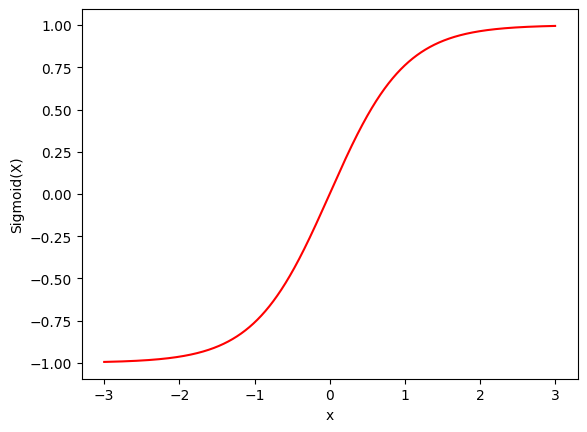

In [4]:
x_values = np.linspace(-3, 3, 10000)
f = np.tanh(x_values)
plt.plot(x_values, f, 'red')
plt.xlabel('x')
plt.ylabel("Sigmoid(X)")
plt.show()

## Softmax

As we have shown earlier in module I, logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.  Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.  The softmax activation function generates a vector of (normalized) probabilities with one value for each possible class.

The Softmax activation function is given as: $\text{Softmax}(x_{z}) = \frac{e^{x_z}}{\sum_z e^{x_z}}$.

In [5]:
def softmax(x):
    ''' Compute softmax values for each sets of scores in x. '''
    return np.exp(x) / np.sum(np.exp(x), axis=0)

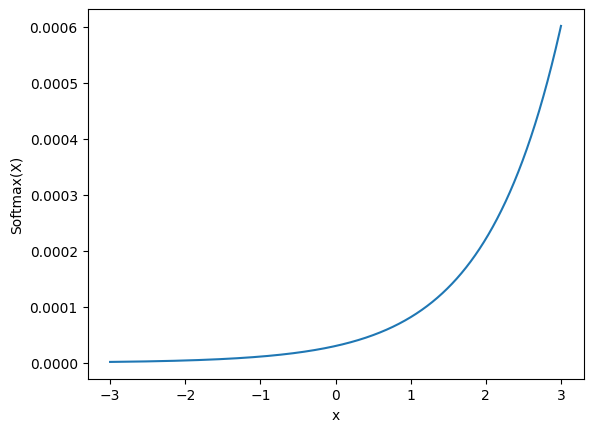

In [6]:
x_values = np.linspace(-3, 3, 10000)
plt.plot(x_values, softmax(x_values))
plt.axis('tight')
plt.ylabel("Softmax(X)")
plt.xlabel('x')
plt.show()

## Rectified Linear Function (ReLU)

In order to use stochastic gradient descent with backpropagation of errors to train deep neural networks, an activation function is needed that looks and acts like a linear function, but is, in fact, a nonlinear function allowing complex relationships in the data to be learned.  The function must also provide more sensitivity to the activation sum input and avoid easy saturation.  The solution is to use the rectified linear activation function.  A node or unit that implements this activation function is referred to as a rectified linear activation unit, or ReLU for short. Often, networks that use the rectifier function for the hidden layers are referred to as rectified networks.

The ReLU function, $\text{ReLU}(x) = (x)^+ = \max(0, x)$, returns 0 if the x (input) is less than 0 and x otherwise.
if the x (input) is greater than 0

Because rectified linear units are nearly linear, they preserve many of the properties that make linear models easy to optimize with gradient-based methods. They also preserve many of the properties that make linear models generalize well.  The advantages of ReLU are:

1. Computational Simplicity.
2. Representational Sparsity
3. Linear Behavior
4. Train Deep Networks

It should be noted that when the value in the ReLu function is negative, no learning happens as the new weight remains equal to the old weight since the value of the derivative is 0. This is called the “Dead Neuron” issue.

In [7]:
def ReLU(x):
    ''' It returns zero if the input is less than zero otherwise it returns the given input. '''
    x1=[]
    for i in x:
        if i<0:
            x1.append(0)
        else:
            x1.append(i)

    return x1

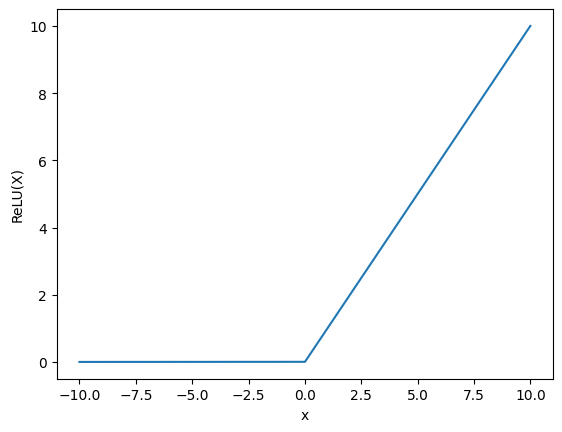

In [8]:
x_values = np.linspace(-10, 10, 10000)
plt.plot(x_values, ReLU(x_values))
plt.axis('tight')
plt.ylabel("ReLU(X)")
plt.xlabel('x')
plt.show()

## Leaky Rectified Linear Function (LReLU)

The Leaky ReLU activation function was developed to overcome one of the major shortcomings of ReLU activation function. Recall, the ReLU activation function gives the derivate as 1 when the value is positive. In case when the value is negative, the derivative becomes 0 during backpropagation.  This means that when the value is negative, no learning happens since during the backpropagation stage, zero values' gradient descents become zero again and they do not converge to good local minimum. It is a dead end situation. Leaky ReLU substitutes zero values with some small value say 0.001 (referred as “alpha”). So, for leaky ReLU, the function is:

$f(x) = max(0.001x, x)$

Now gradient descent of 0.001x will be having a non-zero value and it will continue learning without reaching dead end. Hence, leaky ReLU performs better than ReLU.

In [9]:
def LReLU(x):
    ''' It returns zero if the input is less than zero otherwise it returns the given input. '''
    return np.where(x > 0, x, x * 0.01) 


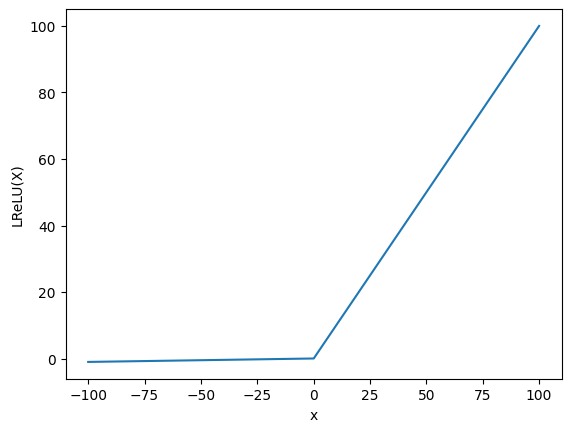

In [10]:
x_values = np.linspace(-100, 100, 100000)
plt.plot(x_values, LReLU(x_values))
plt.axis('tight')
plt.ylabel("LReLU(X)")
plt.xlabel('x')
plt.show()

## Swish

Swish is a smooth, non-monotonic function that consistently matches or outperforms ReLU on deep networks applied to a variety of challenging domains such as Image classification and Machine translation. 

Swish is an activation function, $ f(x) = x . \sigma(\beta x)$ where $\beta$ is a learnable parameter. Nearly all implementations do not use the learnable parameter $\beta$ in which case the activation function is $x.\sigma(x)$ ("Swish-1").

The function $x.\sigma(x)$ is exactly the SiLU, which was introduced by other authors before the swish. See Gaussian Error Linear Units (GELUs) where the SiLU (Sigmoid Linear Unit) was originally coined, and see Sigmoid-Weighted Linear Units for Neural Network Function Approximation in Reinforcement Learning and Swish: a Self-Gated Activation Function where the same activation function was experimented with later.

With MNIST data set, when Swish and ReLU are compared, both activation functions achieve similar performances up to 40 layers. However, Swish outperforms ReLU by a large margin in the range between 40 and 50 layers when optimization becomes difficult. In very deep networks, Swish achieves higher test accuracy than ReLU. In terms of batch size, the performance of both activation functions decrease as batch size increases, potentially due to sharp minima (Keskar et al., 2017). However, Swish outperforms ReLU on every batch size, suggesting that the performance difference between the two activation functions remains even when varying the batch size.

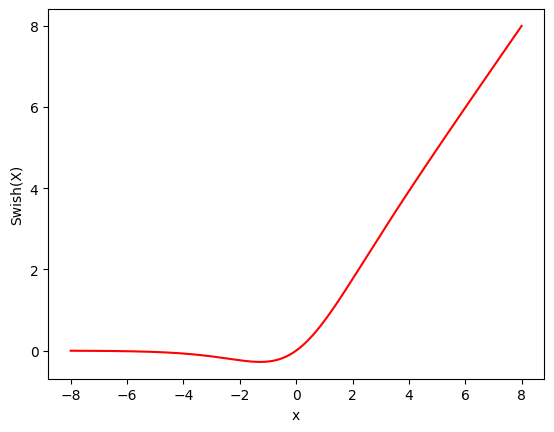

In [11]:
x_values = np.linspace(-8, 8, 10000)
f = (x_values/(1+np.exp(-x_values)))
plt.plot(x_values, f, 'red')
plt.xlabel('x')
plt.ylabel("Swish(X)")
plt.show()

## tanhx+0.2x

We can complicate the The hyperbolic tangent function her by adding a linear term 0.2*x to the output to prevent the derivative from approaching 0:



$f(x) = \frac{e^{x} - e^{-x}} {e^x + e^{-x}}+0.2*x$

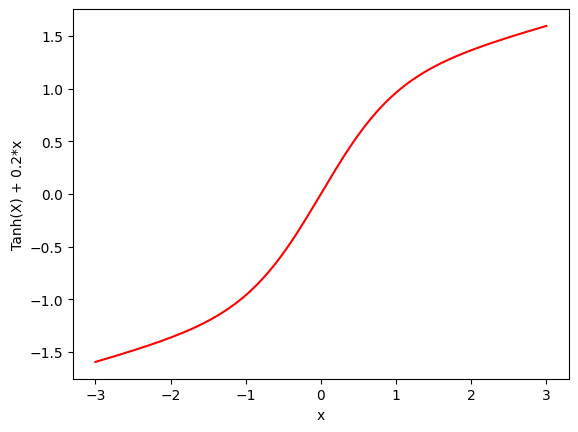

In [12]:
x_values = np.linspace(-3, 3, 10000)
f = np.tanh(x_values) + 0.2*x_values
plt.plot(x_values, f, 'red')
plt.xlabel('x')
plt.ylabel("Tanh(X) + 0.2*x")
plt.show()

## ELU

The Exponential Linear Unit (ELU) are activation functions which, in contrast to ReLUs, have negative values which allow them to push mean unit activations closer to zero like batch normalization but with lower computational complexity. Mean shifts toward zero speed up learning by bringing the normal gradient closer to the unit natural gradient because of a reduced bias shift effect. While LReLUs and PReLUs have negative values, too, they do not ensure a noise-robust deactivation state. ELUs saturate to a negative value with smaller inputs and thereby decrease the forward propagated variation and information.

Elu is implemented as follows:

The exponential linear unit (ELU) with $\alpha > 0$ is:

$f(x) = x$ if $x>0$

$\alpha(e^x -1)$ if $x \leq 0$

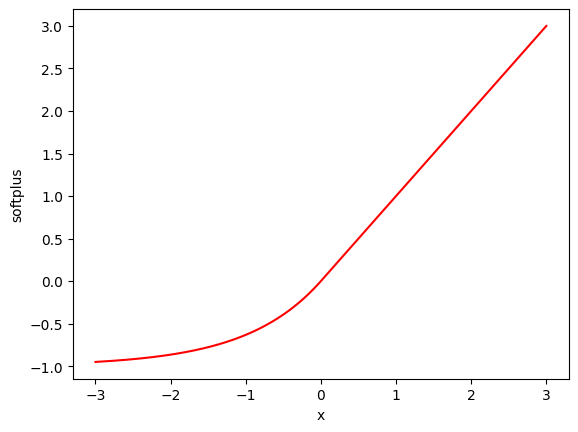

In [13]:
def elu(x, alpha):
    return np.where(x > 0, x, alpha*(np.e**x-1)) 

x_values = np.linspace(-3, 3, 10000)
f = elu(x_values, 1.0)
plt.plot(x_values, f, 'red')
plt.xlabel('x')
plt.ylabel("softplus")
plt.show()

## softplus

The softplus activation function uses the following:

$f(x) = ln(1+e^x)$

The softplus function can be viewed as a smooth version of ReLU.

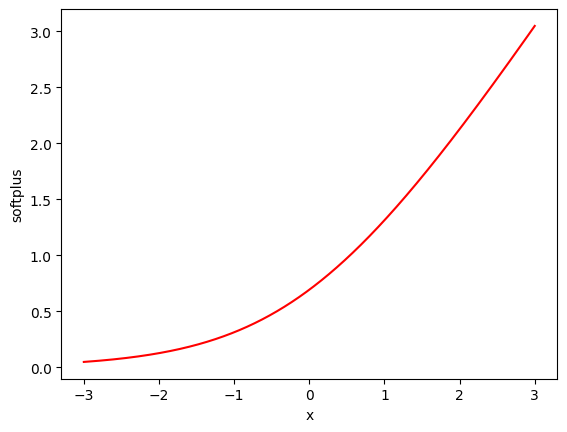

In [14]:
x_values = np.linspace(-3, 3, 10000)
f = np.log(1+np.e**x_values)
plt.plot(x_values, f, 'red')
plt.xlabel('x')
plt.ylabel("softplus")
plt.show()

In [15]:
from tensorflow.keras.datasets import mnist

2025-06-21 07:06:38.214030: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-21 07:06:38.250972: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-21 07:06:39.793106: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [16]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [17]:
x_train = x_train / 255
x_valid = x_valid / 255

In [18]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
%%timeit
model1 = Sequential()

model1.add(Dense(units=512, activation='softplus', input_shape=(784,)))
model1.add(Dense(units = 512, activation='softplus'))
model1.add(Dense(units = 10, activation='softmax'))

model1.compile(loss='categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(
    x_train, y_train, epochs=2, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8136 - loss: 0.6289 - val_accuracy: 0.9526 - val_loss: 0.1514
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9608 - loss: 0.1328 - val_accuracy: 0.9698 - val_loss: 0.0974
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8168 - loss: 0.6067 - val_accuracy: 0.9610 - val_loss: 0.1305
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9596 - loss: 0.1368 - val_accuracy: 0.9669 - val_loss: 0.1100
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8118 - loss: 0.6244 - val_accuracy: 0.9519 - val_loss: 0.1549
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9615 - loss: 0.1299 - val_accuracy: 0.9681 - val_loss: 0.1107
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8175 - loss: 0.6249 - val_accuracy: 0.9523 - val_loss: 0.1545
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9593 - loss: 0.1332 - 

In [22]:
%%timeit
model2 = Sequential()

model2.add(Dense(units=512, activation='linear', input_shape=(784,)))
model2.add(Dense(units = 512, activation='linear'))
model2.add(Dense(units = 10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])

history = model2.fit(
    x_train, y_train, epochs=2, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8426 - loss: 0.5434 - val_accuracy: 0.8887 - val_loss: 0.3808
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8977 - loss: 0.3596 - val_accuracy: 0.9104 - val_loss: 0.3277
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8408 - loss: 0.5518 - val_accuracy: 0.9074 - val_loss: 0.3256
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8989 - loss: 0.3598 - val_accuracy: 0.9081 - val_loss: 0.3263
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8425 - loss: 0.5458 - val_accuracy: 0.9043 - val_loss: 0.3433
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8984 - loss: 0.3552 - val_accuracy: 0.9023 - val_loss: 0.3481
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8446 - loss: 0.5460 - val_accuracy: 0.8874 - val_loss: 0.3837
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8995 - loss: 0.3585 - 

In [23]:
%%timeit
model3 = Sequential()

model3.add(Dense(units=512, activation='relu', input_shape=(784,)))
model3.add(Dense(units = 512, activation='relu'))
model3.add(Dense(units = 10, activation='softmax'))

model3.compile(loss='categorical_crossentropy', metrics=['accuracy'])

history = model3.fit(
    x_train, y_train, epochs=2, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9016 - loss: 0.3193 - val_accuracy: 0.9678 - val_loss: 0.1071
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9762 - loss: 0.0813 - val_accuracy: 0.9789 - val_loss: 0.0725
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9058 - loss: 0.3084 - val_accuracy: 0.9737 - val_loss: 0.0834
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9757 - loss: 0.0813 - val_accuracy: 0.9764 - val_loss: 0.0914
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9022 - loss: 0.3149 - val_accuracy: 0.9715 - val_loss: 0.0901
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9745 - loss: 0.0877 - val_accuracy: 0.9769 - val_loss: 0.0822
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9035 - loss: 0.3118 - val_accuracy: 0.9678 - val_loss: 0.1110
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9768 - loss: 0.0823 - 

In [25]:
%%timeit
model4 = Sequential()

model4.add(Dense(units=512, activation='leaky_relu', input_shape=(784,)))
model4.add(Dense(units = 512, activation='leaky_relu'))
model4.add(Dense(units = 10, activation='softmax'))

model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])

history = model4.fit(
    x_train, y_train, epochs=2, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8955 - loss: 0.3381 - val_accuracy: 0.9608 - val_loss: 0.1331
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9668 - loss: 0.1138 - val_accuracy: 0.9693 - val_loss: 0.1088
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8977 - loss: 0.3282 - val_accuracy: 0.9646 - val_loss: 0.1178
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9666 - loss: 0.1139 - val_accuracy: 0.9647 - val_loss: 0.1247
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8991 - loss: 0.3274 - val_accuracy: 0.9653 - val_loss: 0.1175
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9665 - loss: 0.1146 - val_accuracy: 0.9594 - val_loss: 0.1380
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8952 - loss: 0.3349 - val_accuracy: 0.9583 - val_loss: 0.1371
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9626 - loss: 0.1191 - 

In [26]:
%%timeit
model5 = Sequential()

model5.add(Dense(units=512, activation='relu', input_shape=(784,)))
model5.add(Dense(units = 512, activation='relu'))
model5.add(Dense(units = 512, activation='relu'))
model5.add(Dense(units = 10, activation='softmax'))

model5.compile(loss='categorical_crossentropy', metrics=['accuracy'])

history = model5.fit(
    x_train, y_train, epochs=2, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8913 - loss: 0.3493 - val_accuracy: 0.9737 - val_loss: 0.0939
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9735 - loss: 0.0984 - val_accuracy: 0.9731 - val_loss: 0.1045
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8936 - loss: 0.3385 - val_accuracy: 0.9691 - val_loss: 0.0988
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9716 - loss: 0.1002 - val_accuracy: 0.9740 - val_loss: 0.0996
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8943 - loss: 0.3423 - val_accuracy: 0.9699 - val_loss: 0.1000
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9736 - loss: 0.0987 - val_accuracy: 0.9718 - val_loss: 0.0907
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8921 - loss: 0.3407 - val_accuracy: 0.9613 - val_loss: 0.1316
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9725 - loss: 0

In [27]:
%%timeit
model6 = Sequential()

model6.add(Dense(units=512, activation='linear', input_shape=(784,)))
model6.add(Dense(units = 512, activation='linear'))
model6.add(Dense(units = 512, activation='linear'))
model6.add(Dense(units = 10, activation='softmax'))

model6.compile(loss='categorical_crossentropy', metrics=['accuracy'])

history = model6.fit(
    x_train, y_train, epochs=2, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8160 - loss: 0.6652 - val_accuracy: 0.8944 - val_loss: 0.3831
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8906 - loss: 0.3844 - val_accuracy: 0.8954 - val_loss: 0.3615
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8146 - loss: 0.6552 - val_accuracy: 0.8678 - val_loss: 0.4624
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8883 - loss: 0.3852 - val_accuracy: 0.9039 - val_loss: 0.3463
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8155 - loss: 0.6530 - val_accuracy: 0.8949 - val_loss: 0.3862
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8935 - loss: 0.3736 - val_accuracy: 0.8989 - val_loss: 0.3646
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8151 - loss: 0.6627 - val_accuracy: 0.8770 - val_loss: 0.4160
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8913 - loss: 0

In [28]:
%%timeit
model7 = Sequential()

model7.add(Dense(units=512, activation='sigmoid', input_shape=(784,)))
model7.add(Dense(units = 512, activation='sigmoid'))
model7.add(Dense(units = 10, activation='softmax'))

model7.compile(loss='categorical_crossentropy', metrics=['accuracy'])

history = model7.fit(
    x_train, y_train, epochs=2, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7902 - loss: 0.6596 - val_accuracy: 0.9404 - val_loss: 0.1946
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9463 - loss: 0.1752 - val_accuracy: 0.9591 - val_loss: 0.1351
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7885 - loss: 0.6627 - val_accuracy: 0.9424 - val_loss: 0.1875
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9466 - loss: 0.1758 - val_accuracy: 0.9616 - val_loss: 0.1278
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7925 - loss: 0.6613 - val_accuracy: 0.9418 - val_loss: 0.1878
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9487 - loss: 0.1716 - val_accuracy: 0.9532 - val_loss: 0.1396
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7929 - loss: 0.6525 - val_accuracy: 0.9437 - val_loss: 0.1868
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9475 - loss: 0.1713 -